<a href="https://colab.research.google.com/github/Nyawira12/AutoLib-Project/blob/master/Lilian_Kibathi__Python_Notebook_Solution_Moringa_Data_Science_Prep_W4_Independent_Project_2020_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Question

Understand electric car usage over time to determine the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

# Success Metrics



The objectives will be met when:
The most popluar hour of electric car usage is determined under the following parameters:


1.   In Paris
2.   In April 2018

Furthermore, the following questions will need to be answered

3.   What is the most popular hour for returning cars?
4.    What station is the most popular?
  



# Creating a Research Design

> 
  Check for null values and duplicates.

1.  Load dataset
2.  Check for duplicates and null values
3.  Drop the duplicates and fill the null values
4.  Drop irrelevant columns where necessary.
5.  Check for the most popular hours relative to the parameters
6.  Check the popular station




# 1.0 Loading the Dataset

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
Autolib = pd.read_csv('Autolib_dataset (2).csv')


# 1.1 Reviewing the Data

In [50]:
Autolib.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [51]:
Autolib.tail()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27
4999,5 Rue Henry Brisson,4,4,0,0,0,operational,Paris,NaN,paris-henrybrisson-5,STATION,"48.8984293, 2.3347923",75018,Paris/Henry Brisson/5,operational,NaN,0,station,ok,nonexistent,2018,4,8,10,2


In [52]:
Autolib.columns


Index(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City',
       'Displayed comment', 'ID', 'Kind', 'Geo point', 'Postal code',
       'Public name', 'Rental status', 'Scheduled at', 'Slots', 'Station type',
       'Status', 'Subscription status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

In [53]:
Autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [54]:
Autolib.isnull().sum()

Address                   0
Cars                      0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Geo point                 0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Status                    0
Subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64

In [55]:
Autolib.duplicated().sum()

0

In [56]:
Autolib.shape

(5000, 25)

# 1.2 Cleaning Data

In [57]:
Autolib.columns = Autolib.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
Autolib.columns

Index(['address', 'cars', 'bluecar_counter', 'utilib_counter',
       'utilib_1.4_counter', 'charge_slots', 'charging_status', 'city',
       'displayed_comment', 'id', 'kind', 'geo_point', 'postal_code',
       'public_name', 'rental_status', 'scheduled_at', 'slots', 'station_type',
       'status', 'subscription_status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

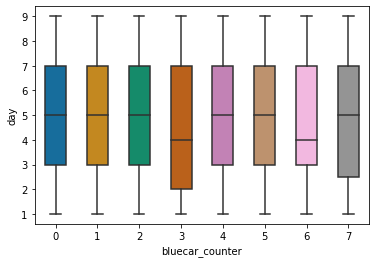

In [58]:
#no outliers by day
bplot=sns.boxplot( x ='bluecar_counter', y= 'day',
                 data=Autolib, 
                 width=0.5,
                 palette="colorblind")

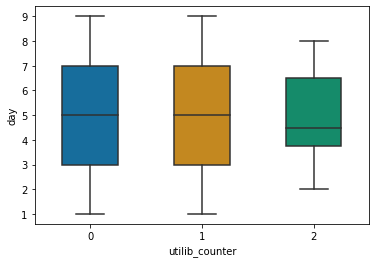

In [60]:
bplot=sns.boxplot( x ='utilib_counter', y= 'day',
                 data=Autolib, 
                 width=0.5,
                 palette="colorblind")

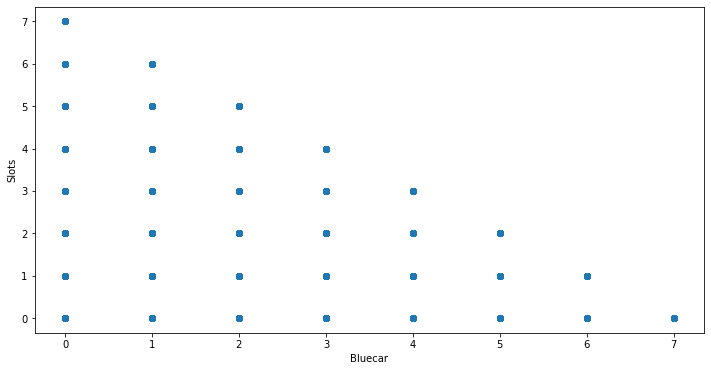

In [105]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(Autolib['bluecar_counter'], Autolib['slots'])
ax.set_xlabel('Bluecar')
ax.set_ylabel('Slots')
plt.show()

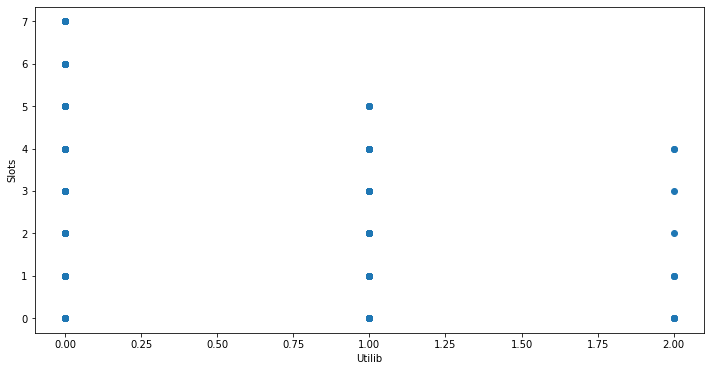

In [106]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(Autolib['utilib_counter'], Autolib['slots'])
ax.set_xlabel('Utilib')
ax.set_ylabel('Slots')
plt.show()

In [59]:
Autolib.drop(["displayed_comment", "scheduled_at", "public_name"], axis = 1, inplace = True)

In [61]:
#creating columns toperform the analysis based on the stauts of the car
Autolib['bluecar_stat'] = Autolib.bluecar_counter.diff()
Autolib['utilib_stat'] = Autolib.utilib_counter.diff()
Autolib.head()

,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,geo_point,postal_code,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute,bluecar_stat,utilib_stat
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,operational,2,station,ok,nonexistent,2018,4,8,11,43,NaN,NaN
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,operational,0,station,ok,nonexistent,2018,4,6,7,24,6.0,0.0
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,operational,1,station,ok,nonexistent,2018,4,3,20,14,-3.0,0.0
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,operational,2,station,ok,nonexistent,2018,4,4,4,37,0.0,1.0
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,operational,3,station,ok,nonexistent,2018,4,8,17,23,0.0,-1.0


In [62]:
Autolib.to_csv('Dataset.csv')

In [63]:
Autolib_DS = pd.read_csv('Dataset.csv')

# 1.3 Data Analysis

In [64]:
Autolib_DS.drop('Unnamed: 0', axis=1, inplace=True)
Autolib_DS.head()


,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,geo_point,postal_code,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute,bluecar_stat,utilib_stat
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,operational,2,station,ok,nonexistent,2018,4,8,11,43,NaN,NaN
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,operational,0,station,ok,nonexistent,2018,4,6,7,24,6.0,0.0
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,operational,1,station,ok,nonexistent,2018,4,3,20,14,-3.0,0.0
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,operational,2,station,ok,nonexistent,2018,4,4,4,37,0.0,1.0
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,operational,3,station,ok,nonexistent,2018,4,8,17,23,0.0,-1.0


In [65]:
Set1 = Autolib_DS[(Autolib_DS.year == 2018) & (Autolib_DS.month == 4)]
Set1.head()


,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,geo_point,postal_code,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute,bluecar_stat,utilib_stat
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,operational,2,station,ok,nonexistent,2018,4,8,11,43,NaN,NaN
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,operational,0,station,ok,nonexistent,2018,4,6,7,24,6.0,0.0
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,operational,1,station,ok,nonexistent,2018,4,3,20,14,-3.0,0.0
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,operational,2,station,ok,nonexistent,2018,4,4,4,37,0.0,1.0
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,operational,3,station,ok,nonexistent,2018,4,8,17,23,0.0,-1.0


# Blue Car

In [66]:
A = Set1.groupby('kind')['bluecar_counter'].value_counts().sort_values(ascending=False).head(20)
B = Set1.groupby('city')['bluecar_counter'].value_counts().sort_values(ascending=False).head(20)
print(A + B)

bluecar_counter  kind     city               
0                STATION  Paris                  2237.0
                          Gennevilliers          1229.0
                          Alfortville            1228.0
                          Issy-les-Moulineaux    1224.0
                 PARKING  Paris                  1150.0
                          Gennevilliers           142.0
                          Alfortville             141.0
                          Issy-les-Moulineaux     137.0
                 SPACE    Paris                  1144.0
                          Gennevilliers           136.0
                          Alfortville             135.0
                          Issy-les-Moulineaux     131.0
1                STATION  Paris                  1045.0
                 SPACE    Paris                   501.0
                 PARKING  Paris                   467.0
2                STATION  Paris                   907.0
                          Rueil-Malmaison         579.0
  

In [67]:
Set2 = Set1[(Set1.charging_status == 'operational') & (Set1.rental_status == 'operational')]
Set2.head()

,address,cars,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,geo_point,postal_code,rental_status,slots,station_type,status,subscription_status,year,month,day,hour,minute,bluecar_stat,utilib_stat
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,operational,0,station,ok,nonexistent,2018,4,6,7,24,6.0,0.0
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,operational,1,station,ok,nonexistent,2018,4,3,20,14,-3.0,0.0
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,operational,2,station,ok,nonexistent,2018,4,4,4,37,0.0,1.0
10,14 rue Censier,0,0,0,0,2,operational,Paris,paris-censier-14,STATION,"48.8411067, 2.3544235",75005,operational,6,station,ok,nonexistent,2018,4,1,4,39,-6.0,0.0
14,8 Boulevard Richard Lenoir,0,0,0,0,1,operational,Paris,paris-richardlenoir-8,STATION,"48.8545026, 2.370183",75011,operational,4,station,ok,nonexistent,2018,4,6,8,0,0.0,0.0


In [68]:
Set2.groupby(by='station_type')['bluecar_counter'].value_counts().sort_values(ascending=False)

station_type  bluecar_counter
station       0                  523
              1                  301
              3                  278
              2                  241
              4                  234
              5                  181
              6                  100
full_station  0                   37
              1                   23
              3                   21
              4                   19
              2                   19
              5                   12
station       7                    5
full_station  6                    1
Name: bluecar_counter, dtype: int64

In [76]:
#Most popular hour for picking the blue car relative to address
Set2[(Set2.city == 'Paris') & (Set2.bluecar_stat < 0)].groupby('address')['hour'].count().sort_values(ascending = False)[0:5]

address
169 avenue de Flandre     8
23 rue des Bernardins     7
182 Boulevard Voltaire    7
4 Rue Charles Bossut      6
69 Rue de Courcelles      6
Name: hour, dtype: int64

In [83]:
#Most popular hour for picking the blue car relative to hours
Set2[(Set2.city == 'Paris') & (Set2.bluecar_stat < 0)].groupby('hour')['bluecar_counter'].count().sort_values(ascending = False).head(5)

hour
21    46
13    43
20    42
16    41
18    40
Name: bluecar_counter, dtype: int64

In [84]:
#Most popular hours for returning the blue car
Set2[Set2.bluecar_stat > 0].groupby('hour')['bluecar_counter'].count().sort_values(ascending = False)[0:10]

hour
10    42
3     41
11    39
6     38
2     37
15    36
21    35
8     35
1     33
9     33
Name: bluecar_counter, dtype: int64

In [85]:
#Most popular station that picks the car
Set2[(Set2['bluecar_stat'] < 0)& (Set2['status'] == 'ok')].groupby('id')['bluecar_counter'].count().sort_values(ascending=False).head(10)


id
paris-flandre-169           8
paris-voltaire-182          7
paris-bernardins-23         7
paris-bac-142               6
paris-charlesbossut-4       6
paris-lobineau-9            6
paris-quatreseptembre-10    6
paris-darcet-28             6
paris-tronchet-19           6
paris-sainthonore-123       6
Name: bluecar_counter, dtype: int64

In [104]:
#Most popular station that returns the car
Set2[(Set2['bluecar_stat'] > 0)& (Set2['status'] == 'ok')].groupby('id')['bluecar_counter'].count().sort_values(ascending=False).head(10)


id
paris-portedemontrouge-8     8
paris-georgesmandel-42       7
paris-macmahon-5             7
suresnes-marcelmonge-2       6
paris-philippeauguste-126    6
paris-julienlacroix-39       6
paris-taillebourg-2          6
paris-mozart-68              6
paris-olier-15               6
paris-victorhugo-93          5
Name: bluecar_counter, dtype: int64

In [88]:
#most popular costal code for picking the car
Set2[(Set2['bluecar_stat'] < 0)].groupby('postal_code')['bluecar_counter'].count().sort_values(ascending= False)[0:10]

postal_code
75008    82
75012    68
75017    67
75015    60
75013    55
75019    50
75016    48
75007    45
75011    42
75018    40
Name: bluecar_counter, dtype: int64

In [91]:
#most popular costal code for returning the car
Set2[(Set2['bluecar_stat'] > 0)].groupby('postal_code')['bluecar_counter'].count().sort_values(ascending= False)[0:10]

postal_code
75016    76
75017    75
75015    69
75020    67
75011    55
75013    51
75019    48
75014    43
75018    41
75012    32
Name: bluecar_counter, dtype: int64

# Utilib

In [93]:
C = Set1.groupby('kind')['utilib_counter'].value_counts().sort_values(ascending=False).head(20)
D = Set1.groupby('city')['utilib_counter'].value_counts().sort_values(ascending=False).head(20)
print(C + D)

utilib_counter  kind     city               
0               STATION  Paris                  6805.0
                         Nanterre               4248.0
                         Issy-les-Moulineaux    4227.0
                         CrÃ©teil               4213.0
                         Rueil-Malmaison        4207.0
                                                 ...  
                CENTER   Vanves                   36.0
1               STATION  Paris                   379.0
                SPACE    Paris                   151.0
                PARKING  Paris                   140.0
2               STATION  NaN                       NaN
Name: utilib_counter, Length: 80, dtype: float64


In [94]:
Set2.groupby(by='station_type')['utilib_counter'].value_counts().sort_values(ascending=False)

station_type  utilib_counter
station       0                 1754
full_station  0                  126
station       1                  104
full_station  1                    6
station       2                    5
Name: utilib_counter, dtype: int64

In [95]:
#Most popular hour for picking the utilib relative to address
Set2[(Set2.city == 'Paris') & (Set2.utilib_stat < 0)].groupby('address')['hour'].count().sort_values(ascending = False)[0:5]

address
24 rue de la Paix           2
108 Rue Balard              2
2 rue PÃ©trarque            2
2 boulevard Edgar Quinet    2
19 rue BrÃ©montier          2
Name: hour, dtype: int64

In [97]:
#most popular hour for picking the utilib car relative to hours
Set2[(Set2.city == 'Paris') & (Set2.utilib_stat < 0)].groupby('hour')['utilib_counter'].count().sort_values(ascending = False).head(5)

hour
19    8
22    8
6     7
23    6
14    6
Name: utilib_counter, dtype: int64

In [100]:
#most popular hour for returning the utilib car relative to hours
Set2[(Set2.city == 'Paris') & (Set2.utilib_stat > 0)].groupby('hour')['utilib_counter'].count().sort_values(ascending = False).head(5)

hour
6     9
17    7
7     7
21    6
18    6
Name: utilib_counter, dtype: int64

In [101]:
#most popular station that picks the car
Set2[(Set2['utilib_stat'] < 0)& (Set2['status'] == 'ok')].groupby('id')['utilib_counter'].count().sort_values(ascending=False).head(10)

id
paris-depart-23             2
paris-charonne-52           2
paris-quatreseptembre-10    2
paris-saintgermain-188      2
paris-emilezola-143         2
paris-balard-108            2
paris-bremontier-19         2
paris-bac-142               2
paris-adolpheyvon-6         2
paris-edgarquinet-2         2
Name: utilib_counter, dtype: int64

In [103]:
#most popular station that returns the car
Set2[(Set2['utilib_stat'] > 0)& (Set2['status'] == 'ok')].groupby('id')['utilib_counter'].count().sort_values(ascending=False).head(10)

id
paris-macmahon-5                4
paris-portedemontrouge-8        4
gennevilliers-petitsmarais-4    3
paris-emileaugier-20            3
paris-dulong-67                 2
paris-mozart-68                 2
paris-murat-1                   2
paris-grenelle-139              2
paris-galvani-25                2
paris-fleurus-2                 2
Name: utilib_counter, dtype: int64

In [102]:
#most popular costal code for picking the car
Set2[(Set2['utilib_stat'] < 0)].groupby('postal_code')['utilib_counter'].count().sort_values(ascending= False)[0:10]

postal_code
75016    14
75015    13
75020    11
75017     8
75019     7
75007     7
75014     6
75009     5
75010     5
75011     5
Name: utilib_counter, dtype: int64

In [99]:
#most popular costal code for returning the car
Set2[(Set2['utilib_stat'] > 0)].groupby('postal_code')['utilib_counter'].count().sort_values(ascending= False)[0:10]

postal_code
75016    15
75017    12
75020    11
75013    11
75015    10
75014     9
75007     4
75018     3
92230     3
75011     3
Name: utilib_counter, dtype: int64